In [27]:
'''
https://blog.patricktriest.com/police-data-python/
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

figsize = (16,8)


In [28]:
df_vt = pd.read_csv('E:\Python\data_analys\data_analys\python_project\police-data-analysis\data\VT-clean.csv.gz',compression='gzip',low_memory=False)
df_vt.head()

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\22746\AppData\Local\Temp\ipykernel_10420\3918319497.py:1: SyntaxWarning: invalid escape sequence '\P'
  df_vt = pd.read_csv('E:\Python\data_analys\data_analys\python_project\police-data-analysis\data\VT-clean.csv.gz',compression='gzip',low_memory=False)


,id,state,stop_date,stop_time,location_raw,county_name,county_fips,fine_grained_location,police_department,driver_gender,...,driver_race,violation_raw,violation,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,officer_id
0,VT-2010-00001,VT,2010-07-01,00:10,East Montpelier,Washington County,50023.0,COUNTY RD,MIDDLESEX VSP,M,...,White,Moving Violation,Moving violation,False,No Search Conducted,NaN,False,Citation,False,-1.562157e+09
1,VT-2010-00002,VT,2010-07-01,00:10,NaN,NaN,NaN,COUNTY RD; Fitch Road,MIDDLESEX VSP,F,...,White,Externally Generated Stop,Other,False,No Search Conducted,NaN,False,Arrest for Violation,True,-1.562157e+09
2,VT-2010-00003,VT,2010-07-01,00:10,NaN,NaN,NaN,COUNTY RD; Fitch Road,MIDDLESEX VSP,F,...,White,Externally Generated Stop,Other,False,No Search Conducted,NaN,False,Arrest for Violation,True,-1.562157e+09
3,VT-2010-00004,VT,2010-07-01,00:11,Whiting,Addison County,50001.0,N MAIN ST,NEW HAVEN VSP,F,...,White,Moving Violation,Moving violation,False,No Search Conducted,NaN,False,Arrest for Violation,True,-3.126844e+08
4,VT-2010-00005,VT,2010-07-01,00:35,Hardwick,Caledonia County,50005.0,i91 nb mm 62,ROYALTON VSP,M,...,White,Moving Violation,Moving violation,False,No Search Conducted,NaN,False,Written Warning,False,9.225661e+08


In [29]:
df_vt.count()

id                       283285
state                    283285
stop_date                283285
stop_time                283285
location_raw             282591
county_name              282580
county_fips              282580
fine_grained_location    282938
police_department        283285
driver_gender            281573
driver_age_raw           282114
driver_age               281999
driver_race_raw          279301
driver_race              278468
violation_raw            281107
violation                281107
search_conducted         283285
search_type_raw          281045
search_type                3419
contraband_found         283251
stop_outcome             280960
is_arrested              283285
officer_id               283273
dtype: int64

In [30]:
'''
df_vt['search_type']：表示从数据框 df_vt 中取出名为 search_type 的这一列。
.fillna('N/A')：意思是把这一列中所有的 空值（NaN） 替换为 'N/A'（Not Applicable，不适用的意思）。
inplace=True：表示就地修改这列数据，而不是返回一个新的副本。也就是说，df_vt['search_type'] 会被直接更新，而不会创建新的变量。
'''

df_vt['search_type'].fillna('N/A',inplace=True)

df_vt.dropna(inplace=True)

df_vt.count()

C:\Users\22746\AppData\Local\Temp\ipykernel_10420\784036287.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_vt['search_type'].fillna('N/A',inplace=True)


id                       273181
state                    273181
stop_date                273181
stop_time                273181
location_raw             273181
county_name              273181
county_fips              273181
fine_grained_location    273181
police_department        273181
driver_gender            273181
driver_age_raw           273181
driver_age               273181
driver_race_raw          273181
driver_race              273181
violation_raw            273181
violation                273181
search_conducted         273181
search_type_raw          273181
search_type              273181
contraband_found         273181
stop_outcome             273181
is_arrested              273181
officer_id               273181
dtype: int64

In [31]:
df_vt['county_name'].value_counts()

county_name
Windham County       37715
Windsor County       36464
Chittenden County    24815
Orange County        24679
Washington County    24633
Rutland County       22885
Addison County       22813
Bennington County    22250
Franklin County      19715
Caledonia County     16505
Orleans County       10344
Lamoille County       8604
Essex County          1239
Grand Isle County      520
Name: count, dtype: int64

In [32]:
df_vt['violation'].value_counts()

violation
Moving violation      212100
Equipment              50600
Other                   9768
DUI                      711
Other (non-mapped)         2
Name: count, dtype: int64

In [33]:
df_vt['stop_outcome'].value_counts()

stop_outcome
Written Warning         166488
Citation                103401
Arrest for Violation      3206
Warrant Arrest              76
Verbal Warning              10
Name: count, dtype: int64

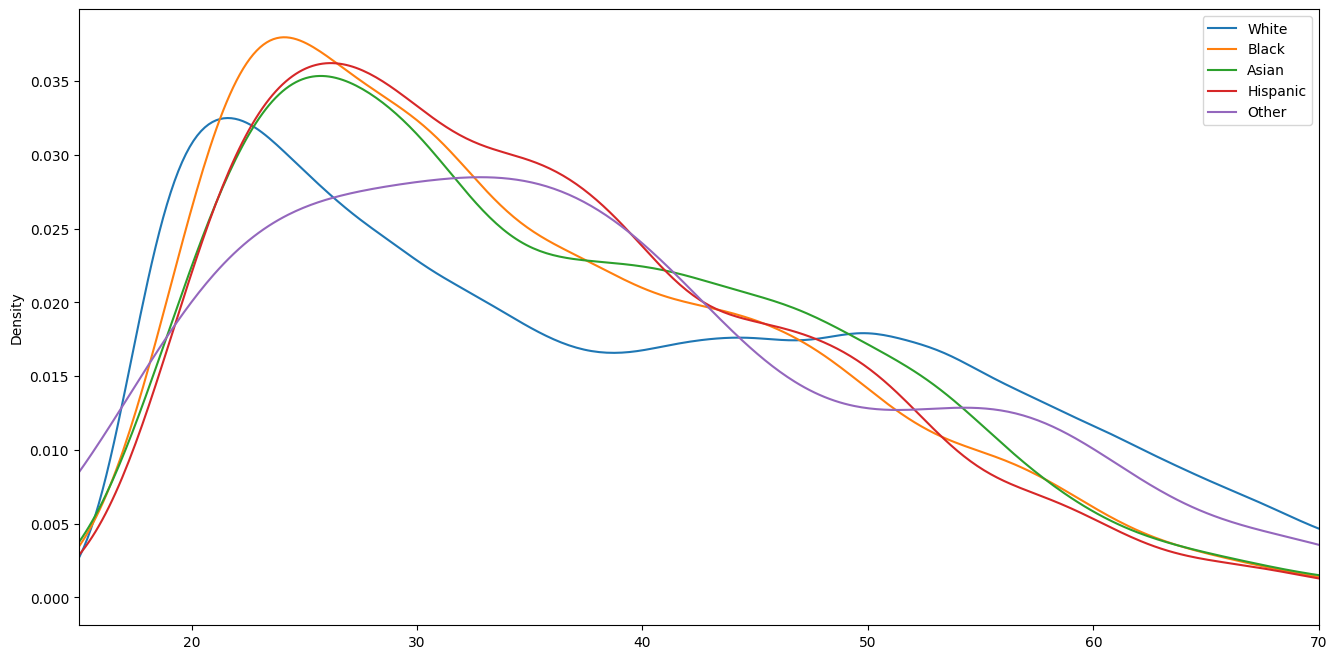

In [34]:
# fig, ax = plt.subplots() 则提供了更强的控制和自定义能力，尤其适合 多个子图（subplots） 的情况
fig,ax = plt.subplots(figsize = figsize)
ax.set_xlim(15,70) # x轴的范围15-70
#对比不同种族（driver_race）的司机年龄分布密度
for race in df_vt['driver_race'].unique():
    s = df_vt[df_vt['driver_race']==race]['driver_age']
    s.plot.kde(ax=ax,label=race) #ax=ax 表示所有的曲线都画在同一个坐标轴上（由 fig, ax = plt.subplots() 创建的）
ax.legend()


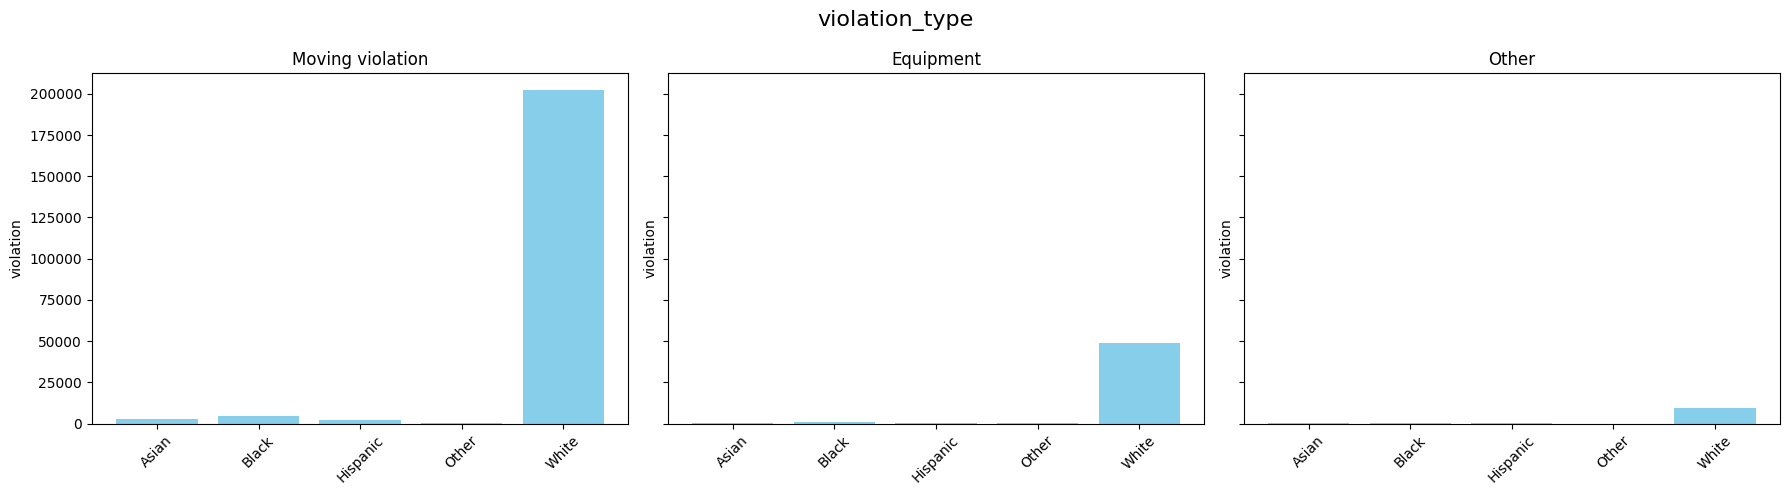

In [35]:
import matplotlib.pyplot as plt

# 按种族分组后，每类违规的次数统计
# 生成一个按照种族分组统计每种违规类型次数的交叉表
# .unstack() 把前面得到的结果“展开”为一个二维表格
# .fillna(0) 某些种族可能没有某类违规，因此对应单元格为 NaN，使用 0 填充
violation_by_race = df_vt.groupby('driver_race')['violation'].value_counts().unstack().fillna(0)

# 创建子图（每列一种违规类型）
# 一次性创建一个含有 3 个横向排列子图的图表布局，并且这 3 个子图共用 Y 轴
# nrows=1, ncols=3：表示布局为 1 行 3 列，也就是 3 个横向排布的子图
# sharey=True：表示这 3 个子图共享同一个 Y 轴
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5), sharey=True)

# 为每列子图绘制不同的柱状图
violation_types = ['Moving violation', 'Equipment', 'Other']
for i, v_type in enumerate(violation_types):
    axes[i].bar(violation_by_race.index, violation_by_race[v_type], color='skyblue')
    
    axes[i].set_title(f'{v_type}')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_ylabel('violation')

fig.suptitle('violation_type', fontsize=16)
plt.tight_layout()
plt.show()


In [36]:

def compute_outcome_stats(df):
    #计算逮捕、警告和罚单的相对数量统计 不同结果之间的比例或对比关系
    n_total = len(df)
    n_warnings = len(df[df['stop_outcome'] == 'Written Warning'])
    n_citations = len(df[df['stop_outcome'] == 'Citation'])
    n_arrests = len(df[df['stop_outcome'] == 'Arrest for Violation'])
    citations_per_warning = n_citations / n_warnings
    arrest_rate = n_arrests / n_total
    
    return(pd.Series(data = {
        'n_total': n_total,
        'n_warnings': n_warnings,
        'n_citations': n_citations,
        'n_arrests': n_arrests,
        'citations_per_warning': citations_per_warning,
        'arrest_rate': arrest_rate
    }))
    
compute_outcome_stats(df_vt)

n_total                  273181.000000
n_warnings               166488.000000
n_citations              103401.000000
n_arrests                  3206.000000
citations_per_warning         0.621072
arrest_rate                   0.011736
dtype: float64

In [37]:
df_vt.groupby('driver_gender').apply(compute_outcome_stats) # split-apply-combine 


C:\Users\22746\AppData\Local\Temp\ipykernel_10420\3831497076.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_vt.groupby('driver_gender').apply(compute_outcome_stats) # split-apply-combine


,n_total,n_warnings,n_citations,n_arrests,citations_per_warning,arrest_rate
driver_gender,,,,,,
F,99111.0,63548.0,34840.0,698.0,0.548247,0.007043
M,174070.0,102940.0,68561.0,2508.0,0.666029,0.014408


In [38]:
df_vt.groupby('driver_race').apply(compute_outcome_stats)

C:\Users\22746\AppData\Local\Temp\ipykernel_10420\1019517362.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_vt.groupby('driver_race').apply(compute_outcome_stats)


,n_total,n_warnings,n_citations,n_arrests,citations_per_warning,arrest_rate
driver_race,,,,,,
Asian,3446.0,1710.0,1714.0,22.0,1.002339,0.006384
Black,5571.0,3026.0,2428.0,111.0,0.802379,0.019925
Hispanic,2562.0,1349.0,1168.0,42.0,0.865827,0.016393
Other,263.0,125.0,131.0,7.0,1.048000,0.026616
White,261339.0,160278.0,97960.0,3024.0,0.611188,0.011571


C:\Users\22746\AppData\Local\Temp\ipykernel_10420\407216754.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  race_agg = df_vt.groupby('driver_race').apply(compute_outcome_stats)


<Axes: title={'center': 'Arrest Rate By Race'}, ylabel='driver_race'>

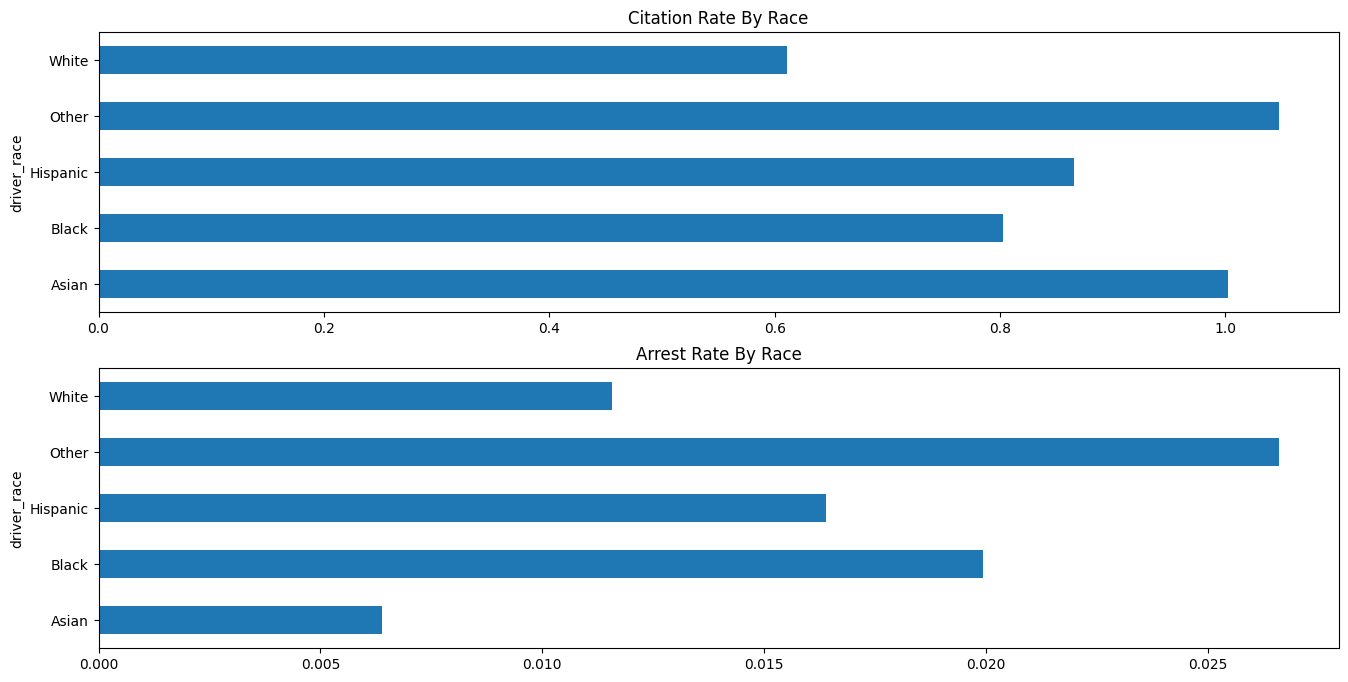

In [39]:
race_agg = df_vt.groupby('driver_race').apply(compute_outcome_stats)
fig,axes = plt.subplots(nrows=2,ncols=1,figsize=(12,6))
race_agg['citations_per_warning'].plot.barh(ax=axes[0],title="Citation Rate By Race",figsize=figsize)
race_agg['arrest_rate'].plot.barh(ax=axes[1],figsize=figsize, title='Arrest Rate By Race')


In [40]:
df_vt.groupby(['driver_race','violation']).apply(compute_outcome_stats)

C:\Users\22746\AppData\Local\Temp\ipykernel_10420\4231461192.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_vt.groupby(['driver_race','violation']).apply(compute_outcome_stats)


n_total  n_warnings  n_citations  n_arrests  \
driver_race violation                                                          
Asian       DUI                     10.0         6.0          2.0        2.0   
            Equipment              319.0       280.0         37.0        2.0   
            Moving violation      3056.0      1392.0       1647.0       17.0   
            Other                   61.0        32.0         28.0        1.0   
Black       DUI                     10.0         7.0          1.0        2.0   
            Equipment              891.0       707.0        156.0       26.0   
            Moving violation      4423.0      2239.0       2110.0       71.0   
            Other                  247.0        73.0        161.0       12.0   
Hispanic    DUI                     10.0         2.0          6.0        2.0   
            Equipment              382.0       314.0         59.0        9.0   
            Moving violation      2093.0      1003.0       1062.0       26.0   
            Other                   77.0        30.0         41.0        5.0   
Other       Equipment               43.0        32.0          8.0        3.0   
            Moving violation       207.0        87.0        117.0        3.0   
            Other                   13.0         6.0          6.0        1.0   
White       DUI                    681.0       378.0        172.0      131.0   
            Equipment            48965.0     40612.0       7736.0      599.0   
            Moving violation    202321.0    115729.0      84797.0     1747.0   
            Other                 9370.0      3558.0       5254.0      547.0   
            Other (non-mapped)       2.0         1.0          1.0        0.0   

                                citations_per_warning  arrest_rate  
driver_race violation                                               
Asian       DUI                              0.333333     0.200000  
            Equipment                        0.132143     0.006270  
            Moving violation                 1.183190     0.005563  
            Other                            0.875000     0.016393  
Black       DUI                              0.142857     0.200000  
            Equipment                        0.220651     0.029181  
            Moving violation                 0.942385     0.016052  
            Other                            2.205479     0.048583  
Hispanic    DUI                              3.000000     0.200000  
            Equipment                        0.187898     0.023560  
            Moving violation                 1.058824     0.012422  
            Other                            1.366667     0.064935  
Other       Equipment                        0.250000     0.069767  
            Moving violation                 1.344828     0.014493  
            Other                            1.000000     0.076923  
White       DUI                              0.455026     0.192364  
            Equipment                        0.190486     0.012233  
            Moving violation                 0.732720     0.008635  
            Other                            1.476672     0.058378  
            Other (non-mapped)               1.000000     0.000000

In [41]:
# # Create new column to represent whether the driver is white
df_vt['is_white'] = df_vt['driver_race'] == 'White'

# # Remove violation with too few data points
df_vt_filter = df_vt[~df_vt['violation'].isin(['Other (non-mapped)', 'DUI'])]
df_vt_filter.groupby(['is_white','violation']).apply(compute_outcome_stats)

C:\Users\22746\AppData\Local\Temp\ipykernel_10420\2270927253.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_vt_filter.groupby(['is_white','violation']).apply(compute_outcome_stats)


n_total  n_warnings  n_citations  n_arrests  \
is_white violation                                                        
False    Equipment           1635.0      1333.0        260.0       40.0   
         Moving violation    9779.0      4721.0       4936.0      117.0   
         Other                398.0       141.0        236.0       19.0   
True     Equipment          48965.0     40612.0       7736.0      599.0   
         Moving violation  202321.0    115729.0      84797.0     1747.0   
         Other               9370.0      3558.0       5254.0      547.0   

                           citations_per_warning  arrest_rate  
is_white violation                                             
False    Equipment                      0.195049     0.024465  
         Moving violation               1.045541     0.011964  
         Other                          1.673759     0.047739  
True     Equipment                      0.190486     0.012233  
         Moving violation               0.732720     0.008635  
         Other                          1.476672     0.058378

C:\Users\22746\AppData\Local\Temp\ipykernel_10420\2874270928.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  race_stats = df_vt_filter.groupby(['violation', 'driver_race']).apply(compute_outcome_stats).unstack()


<Axes: title={'center': 'Citations Per Warning By Race and Violation'}, xlabel='violation'>

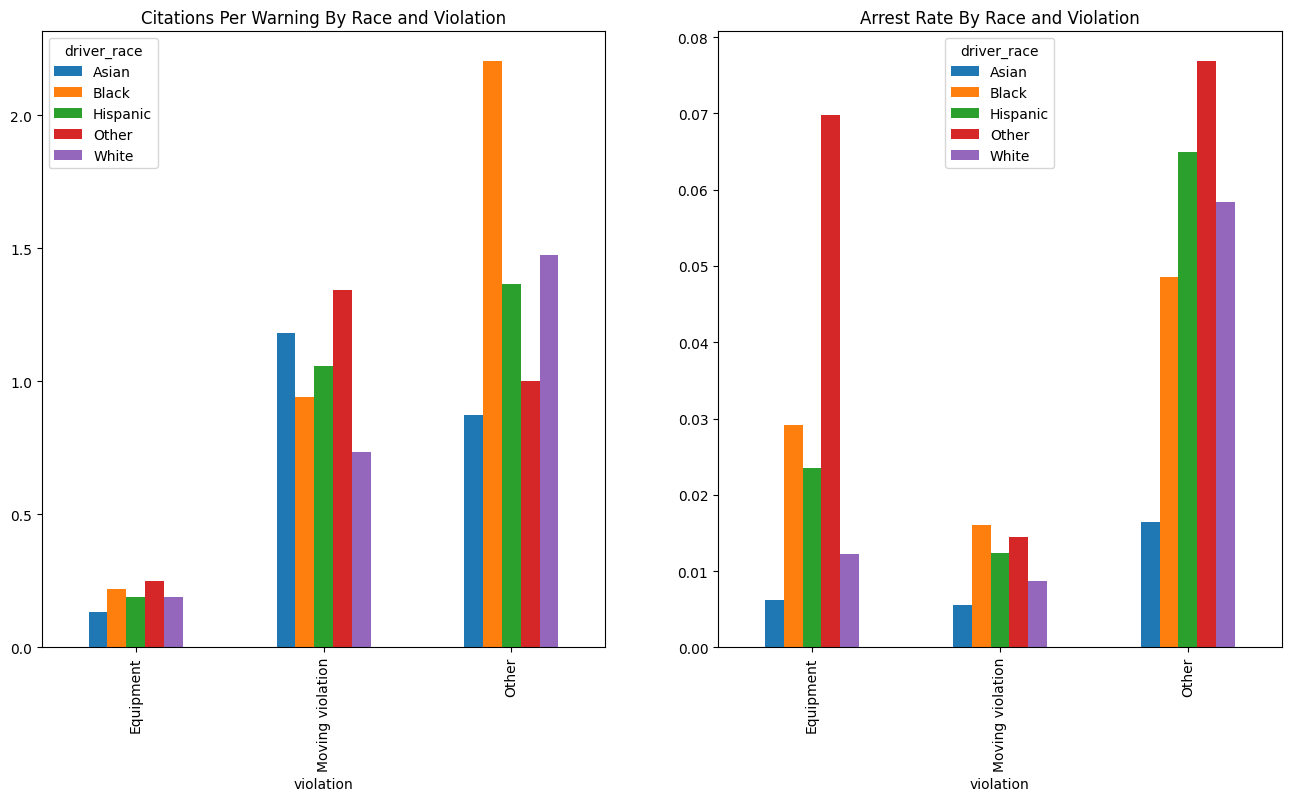

In [42]:
race_stats = df_vt_filter.groupby(['violation', 'driver_race']).apply(compute_outcome_stats).unstack()
fig,axes = plt.subplots(nrows=1,ncols=2,figsize = figsize)
race_stats.plot.bar(y = 'arrest_rate',ax = axes[1],title='Arrest Rate By Race and Violation')
race_stats.plot.bar(y='citations_per_warning', ax=axes[0], title='Citations Per Warning By Race and Violation')

In [43]:
def compute_search_hid_rate(df):
     """Compute the search rate and hit rate"""
     search_conducted = df['search_conducted']
     contraband_found = df['contraband_found']
     
     n_stops = len(search_conducted)
     n_searches  = sum(search_conducted)
     n_hits      = sum(contraband_found)
     # Filter out counties with too few stops
     if n_stops < 50:
          search_rate = None
     else:
          search_rate = n_searches / n_stops
     
     # Filter out counties with too few searches
     if n_searches < 5:
          hit_rate = None
     else:
          hit_rate = n_hits / n_searches
     return(pd.Series({
          'n_stops' : n_stops,
           'n_searches': n_searches,
          'n_hits': n_hits,
          'search_rate': search_rate,
          'hit_rate': hit_rate
     }))

compute_search_hid_rate(df_vt)

n_stops        273181.000000
n_searches       3264.000000
n_hits           2599.000000
search_rate         0.011948
hit_rate            0.796262
dtype: float64

In [44]:
df_vt.groupby('driver_gender').apply(compute_search_hid_rate)

C:\Users\22746\AppData\Local\Temp\ipykernel_10420\3752525224.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_vt.groupby('driver_gender').apply(compute_search_hid_rate)


,n_stops,n_searches,n_hits,search_rate,hit_rate
driver_gender,,,,,
F,99111.0,644.0,508.0,0.006498,0.788820
M,174070.0,2620.0,2091.0,0.015051,0.798092


In [45]:
# 3.4 - Compare Search Stats By Race
age_range = pd.cut(df_vt['driver_age'],np.arange(15,70,5))
df_vt.groupby(age_range).apply(compute_search_hid_rate)

C:\Users\22746\AppData\Local\Temp\ipykernel_10420\3668846090.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_vt.groupby(age_range).apply(compute_search_hid_rate)


,n_stops,n_searches,n_hits,search_rate,hit_rate
driver_age,,,,,
"(15, 20]",27443.0,673.0,570.0,0.024524,0.846954
"(20, 25]",43310.0,1003.0,840.0,0.023159,0.837488
"(25, 30]",34794.0,625.0,493.0,0.017963,0.788800
"(30, 35]",27784.0,373.0,286.0,0.013425,0.766756
"(35, 40]",23241.0,215.0,160.0,0.009251,0.744186
"(40, 45]",24083.0,127.0,88.0,0.005273,0.692913
"(45, 50]",24117.0,106.0,61.0,0.004395,0.575472
"(50, 55]",22532.0,76.0,53.0,0.003373,0.697368
"(55, 60]",17522.0,36.0,30.0,0.002055,0.833333


In [46]:
df_vt.groupby('driver_race').apply(compute_search_hid_rate)

C:\Users\22746\AppData\Local\Temp\ipykernel_10420\971159727.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_vt.groupby('driver_race').apply(compute_search_hid_rate)


,n_stops,n_searches,n_hits,search_rate,hit_rate
driver_race,,,,,
Asian,3446.0,28.0,22.0,0.008125,0.785714
Black,5571.0,284.0,195.0,0.050978,0.686620
Hispanic,2562.0,104.0,67.0,0.040593,0.644231
Other,263.0,10.0,6.0,0.038023,0.600000
White,261339.0,2838.0,2309.0,0.010859,0.813601


In [ ]:
'''
这段代码的核心功能是生成散点图，比较不同种族司机在美国各县的交通搜查相关数据（如搜索率和命中率）。它使用 `matplotlib` 进行数据可视化，并结合 `pandas` 对数据进行处理和聚合。

### 代码结构：
1. **`generate_comparison_scatter(df, ax, state, race, field, color)`**
   - 该函数创建一个比较散点图，将白人司机的统计数据与少数族裔司机的数据进行对比。
   - 它首先按 `county_fips`（县代码）和 `driver_race`（司机种族）进行分组，然后调用 `compute_search_stats` 计算相关数据。
   - 之后，它将数据透视，使其以 `county_fips` 为索引，以 `driver_race` 作为列，提取 `field`（如搜索率或命中率）的值。
   - 最后，它使用 `plot.scatter` 生成一个散点图，横轴表示白人司机数据，纵轴表示特定少数族裔的数据，颜色由 `color` 参数定义。

2. **`format_scatter_chart(ax, state, field)`**
   - 该函数美化散点图，添加标签和标题，使图表更直观。
   - `ax.set_xlabel` 和 `ax.set_ylabel` 分别为横轴和纵轴设置标签，显示所比较的指标（如搜索率）。
   - `ax.set_title` 设置图表标题，包含分析的州名称和字段。
   - 设定 `xlim` 和 `ylim` 以确保图表范围合适。
   - `diag_line` 添加一条虚线，表示理想情况下白人司机和少数族裔司机应该具有相同的搜索或命中率。

3. **`generate_comparison_scatters(df, state)`**
   - 该函数生成两个散点图，一个比较搜索率 (`search_rate`)，另一个比较命中率 (`hit_rate`)。
   - 它调用 `generate_comparison_scatter` 三次，分别绘制黑人、拉丁裔、亚裔与白人司机的数据对比。
   - `format_scatter_chart` 用于美化两张图表。
   - `plt.subplots(nrows=1, ncols=2, figsize=figsize)` 创建一个包含两张图的子图布局。

### 主要用途：
该代码用于分析美国不同种族司机在交通检查中被搜查的概率以及是否发现违禁品。根据结果，研究人员可以观察是否存在种族偏见，例如：
- 如果某个种族的搜索率远高于白人，但命中率较低，则可能表明该种族司机被搜查的标准较低，即存在偏见。
- 如果不同种族的点均匀分布在对角线上，则表明执法标准是一致的。
'''

In [50]:


def generate_comparison_scatter(df, ax, state, race, field, color):
     """Generate scatter plot comparing field for white drivers with minority drivers"""
     #.reset_index() ▶ 把原本作为 groupby 后索引的 county_fips 和 driver_race 恢复为普通列，以便后续使用。
     #.dropna() ▶ 去除那些不满足条件而被设置为 None 的行（如数据太少的组），避免图表里出现空值
     race_location_agg = df.groupby(['county_fips','driver_race']).apply(compute_search_hid_rate).reset_index().dropna()
     race_location_agg = race_location_agg.pivot(index = 'county_fips',columns = 'driver_race',values = field)
     ax = race_location_agg.plot.scatter(ax=ax, x='White', y=race, s=150, label=race, color=color)
     return ax

def format_scatter_chart(ax,state,field):
     ax.set_title(f'{field} by County in {state}')
     """Format and label to scatter chart"""
     ax.set_xlabel('{} - White'.format(field))
     ax.set_ylabel('{} - Non-White'.format(field))
     ax.set_title('{} by County - {}'.format(field,state))
     lim = max(ax.get_xlim()[1], ax.get_ylim()[1])
     ax.set_xlim(0,lim)
     ax.set_ylim(0,lim)
     diag_line = ax.plot(ax.get_xlim(),ax.get_ylim(),ls = '--',c='.3') # 绘制对角线
     ax.legend()    
     return ax

def generate_comparison_scatters(df,state):
     """Generate scatter plots comparing search rates of white drivers with black and hispanic drivers"""
     fig,axes = plt.subplots(nrows = 1, ncols = 2,figsize =figsize)
     generate_comparison_scatter(df, axes[0], state, 'Black', 'search_rate', 'red')
     generate_comparison_scatter(df, axes[0], state, 'Hispanic', 'search_rate', 'orange')
     generate_comparison_scatter(df, axes[0], state, 'Asian', 'search_rate', 'green')
     format_scatter_chart(axes[0], state, 'Search Rate')
     
     generate_comparison_scatter(df, axes[1], state, 'Black', 'hit_rate', 'red')
     generate_comparison_scatter(df, axes[1], state, 'Hispanic', 'hit_rate', 'orange')
     generate_comparison_scatter(df, axes[1], state, 'Asian', 'hit_rate', 'green')
     format_scatter_chart(axes[1], state, 'Hit Rate')
     
     return fig


C:\Users\22746\AppData\Local\Temp\ipykernel_10420\3950399929.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  race_location_agg = df.groupby(['county_fips','driver_race']).apply(compute_search_hid_rate).reset_index().dropna()
C:\Users\22746\AppData\Local\Temp\ipykernel_10420\3950399929.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  race_location_agg = df.groupby(['county_fips','driver_race']).apply(

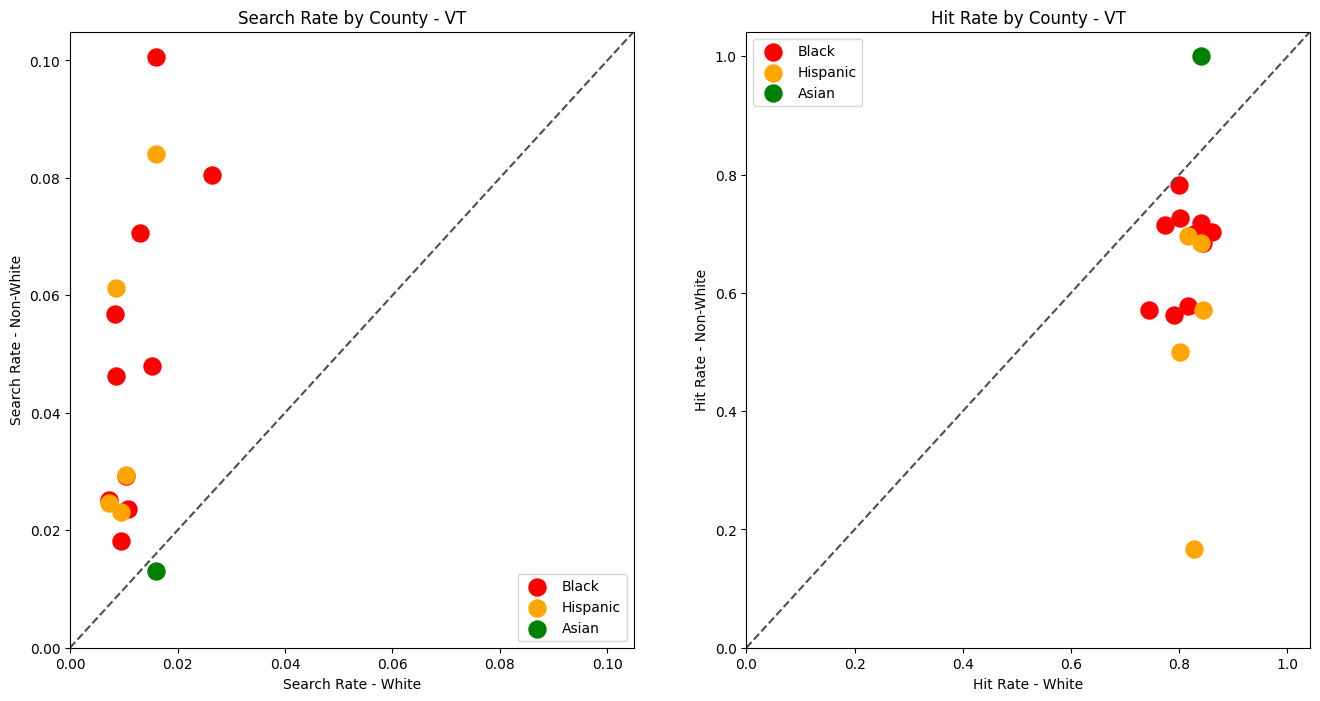

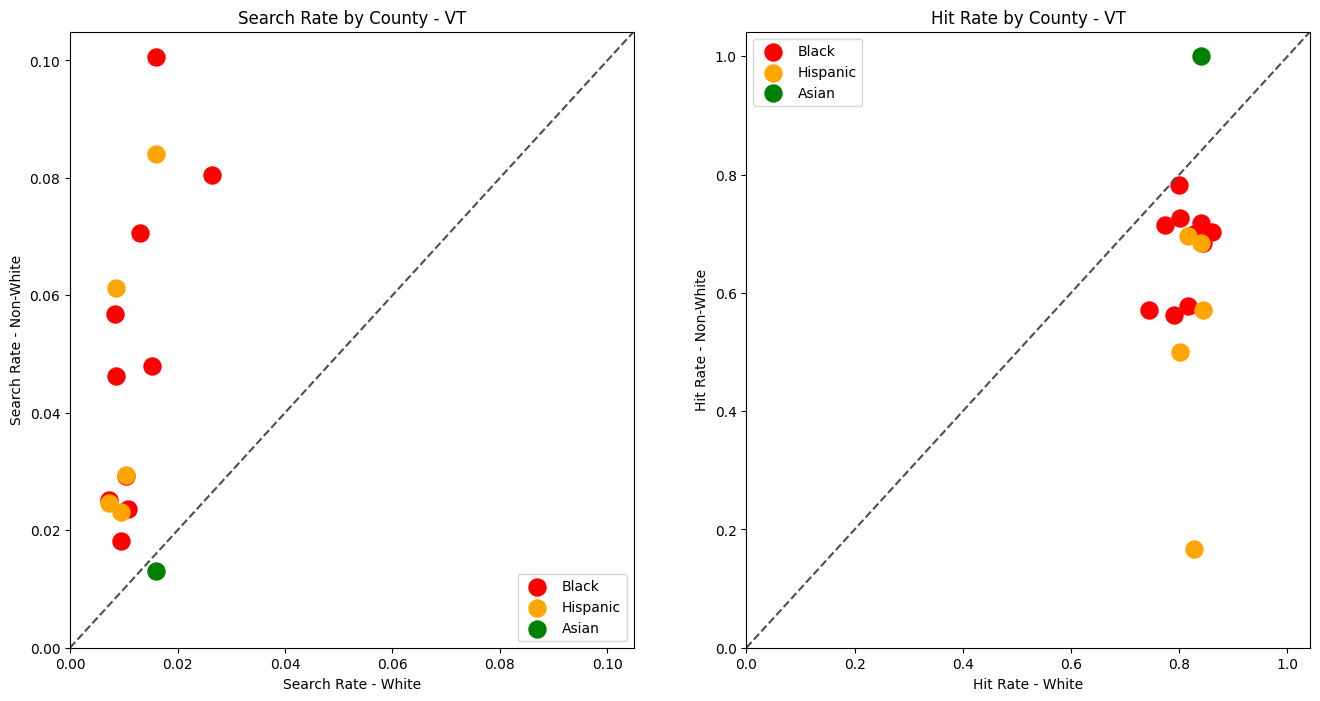

In [52]:
generate_comparison_scatters(df_vt,'VT')

In [ ]:
'''
下面把函数 `generate_county_search_stats_scatter` 拆成逐句解剖——不仅告诉你“它干了什么”，还强调“为什么这样写、有什么坑、有何改进空间”。代码本身出自 Patrick Triest 的警务数据分析示例 notebook。

```python
def generate_county_search_stats_scatter(df, state):
    """Generate a scatter plot of search rate vs. hit rate by race and county"""
```
函数接受：
- `df`：清洗后的交通拦截明细（每行一条拦截记录）  
- `state`：字符串，用于给图起标题  
目标：画出 **每个县 × 每个种族** 的  
  横轴 = hit rate（搜得到违禁品的概率）  
  纵轴 = search rate（被搜身的概率）

---

### 1️⃣ 聚合到“县 × 种族”粒度
```python
    race_location_agg = df.groupby(['county_fips','driver_race']).apply(compute_search_stats)
```
• 先按 `county_fips`（县）与 `driver_race`（司机种族）两列分组。  
• `compute_search_stats` 会对每个分组返回：

| 字段            | 含义                                                    |
|-----------------|---------------------------------------------------------|
| n_stops         | 该县该族的拦截总数                                      |
| n_searches      | 其中进行了搜查的次数                                     |
| n_hits          | 真正搜到违禁品的次数                                     |
| search_rate     | n_searches / n_stops                                    |
| hit_rate        | n_hits / n_searches                                     |

> ⚠️ `compute_search_stats` 内部会把低样本量县过滤成 `NaN`，避免“小样本”噪声。

此步输出是 `MultiIndex`（第一层县，第二层种族）的 DataFrame。

---

### 2️⃣ 颜色列表
```python
    colors = ['blue','orange','red', 'green']
```
手动指定 4 种颜色，稍后用 `.pop()` 逆序取出。  
改进建议：直接用 `matplotlib.cm` 或 `seaborn.color_palette` 可避免列表被耗尽。

---

### 3️⃣ 创建画布
```python
    fig, ax = plt.subplots(figsize=figsize)
```
- `figsize` 是 notebook 开头设定的 (16, 8) 尺寸。  
- `ax` 是唯一的一张子图。

---

### 4️⃣ 按种族依次散点
```python
    for c, frame in race_location_agg.groupby(level='driver_race'):
        ax.scatter(x=frame['hit_rate'], y=frame['search_rate'],
                   s=150, label=c, color=colors.pop())
```
关键点：
1. `groupby(level='driver_race')`：对多层索引只按“第二层＝种族”再分组。
2. `c` 是当前种族名称，`frame` 是一个仅包含该族所有县的子表。
3. `ax.scatter`：
   - `x`：hit_rate  
   - `y`：search_rate  
   - `s=150`：点面积（像素²），150 足够醒目
   - `label=c`：图例
   - `color=colors.pop()`：每族取一色（因为 pop 从列表尾部取值，实际顺序是 green→red→orange→blue）
4. **每个点 = 一个县**。同一族的所有县共用一种颜色。

---

### 5️⃣ 美化图例与坐标
```python
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),
              ncol=4, fancybox=True)
```
- 图例放在图上方正中，并抬高 (`bbox_to_anchor`) 避免遮挡点。
- `ncol=4` 让 4 个种族并排排开。

```python
    ax.set_xlabel('Hit Rate')
    ax.set_ylabel('Search Rate')
    ax.set_title("Search Stats By County and Race - {}".format(state))
```
- 轴名直接写指标名  
- 标题注明州名

```python
    return fig
```
返回整张 `Figure`，方便外部再调用 `plt.show()` 或保存。

---

## 如何解读这张散点图？

```
↑ search_rate
|
|         •                 (一个点 = 某县 × 某族)
|
|      •
|  •
+--------------------→ hit_rate
```

• 若一个族在若干县里 **search_rate 很高而 hit_rate 不升反降**，意味着警察对该族“搜得更多、但收获更少”——常被视为偏搜指标。  
• 颜色把不同族区分开，肉眼即可比对各族云团的位置和形状。  
• 若所有种族云团大体落在同一对角带，则差异可能主要由县情（犯罪、毒品走私路线等）驱动而非种族。  

---

## 可能的改进

| 问题 | 改进思路 |
|------|----------|
| `colors.pop()` 会就地修改列表，种族数 ≠ 颜色数时会报错 | 用 `itertools.cycle` 或 `seaborn.color_palette()` |
| 坐标轴范围未固定，不易比较多张图 | 加入 `ax.set_xlim(0,1)` / `ax.set_ylim(0,0.2)` 或依据数据自动设置统一尺度 |
| 默认标记形状相同，难区分颜色弱视 | 为 `scatter` 增加 `marker` 样式循环 |
| 没有参考线 | 可加 `ax.axhline` / `ax.axvline` 标出全州平均值或 (search_rate, hit_rate) 理想线 |

---

### 一句话总结
`generate_county_search_stats_scatter` 用三步（按县分组→分族画点→加图例标题）把“搜查概率 vs. 命中概率”的 County-Race 分布一目了然地呈现出来，是在 Outcome Test 中查找 **“搜得多、却收获少”** 种族偏搜信号的直观利器。  

: Patrick Triest, “Exploring United States Policing Data Using Python,” 2017-10-27.
'''

In [ ]:
def generate_county_search_stats_scatter(df,stats):
    """Generate a scatter plot of search rate vs. hit rate by race and county"""
    race_location_agg = df.groupby(['county_fips','driver_race']).apply(compute_search_hid_rate)
    
    colors = ['blue','orange','red','green']
    fig,ax = plt.subplots(figsize=figsize)
    for c,frame in race_location_agg.groupby(level='driver_race'):
        ax.scatter(x=frame['hit_rate']),y=frame(['search_rate'],s=150,label=c,color = colors.pop())